<a href="https://colab.research.google.com/github/SudhakarAnemu/AI-DS-ML-DL/blob/master/ML/ImagePrediction/jsfastai-starter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image classification - Kaggle

## 1. Import all Required packages

In [0]:
from fastai.vision import *
from fastai.metrics import accuracy
from fastai.metrics import error_rate
import time
print("Import of requried Pkgs - Done : ", time.ctime())

Import of requried Pkgs - Done :  Wed Sep 18 14:10:00 2019


### 1.1 Import reload commands

In [45]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
print("Reload commands - Done : ", time.ctime())

Reload commands - Done :  Wed Sep 18 17:56:34 2019


## 2. Copy data from GDrive to Notebook

In [37]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [38]:
!ls drive/'My Drive'/images/

datakaggle.tar	sample_submission.csv  test  train


In [0]:
# !mkdir -p 'drive/data'  # error - mkdir: cannot create directory ‘drive/data’: Operation not supported
!mkdir -p data

In [40]:
start_time = time.time()
!cp -R drive/'My Drive'/images/datakaggle.tar data/
print("--- %s mins ---" % ((time.time() - start_time)/60))

--- 0.249227774143219 mins ---


In [0]:
!cp drive/'My Drive'/images/sample_submission.csv data/sample_submission.csv

In [41]:
!ls data

datakaggle.tar	sample_submission.csv


In [0]:
start_time = time.time()
!tar -xvf data/datakaggle.tar
print("--- %s mins ---" % ((time.time() - start_time)/60))

In [0]:
help(fit_one_cycle)

Help on function fit_one_cycle in module fastai.train:

fit_one_cycle(learn:fastai.basic_train.Learner, cyc_len:int, max_lr:Union[float, Collection[float], slice]=slice(None, 0.003, None), moms:Tuple[float, float]=(0.95, 0.85), div_factor:float=25.0, pct_start:float=0.3, final_div:float=None, wd:float=None, callbacks:Union[Collection[fastai.callback.Callback], NoneType]=None, tot_epochs:int=None, start_epoch:int=None) -> None
    Fit a model following the 1cycle policy.



### 2.1 Content of the folder - datakaggle

In [0]:
!ls datakaggle

sample_submission.csv  test  train


## 3. Playing with the Data
<br>Folder datakaggle has all required files and folders

In [0]:
!ls datakaggle

sample_submission.csv  test  train


In [0]:
DATA_DIR = Path('datakaggle')
print("Data Dir(DATA_DIR): ", DATA_DIR)

Data Dir(DATA_DIR):  datakaggle


In [0]:
DATA_DIR/'train'

PosixPath('datakaggle/train')

In [58]:
bs = 64 #bs - Batch size for more images, Adviced multipel to 2. Bigger batch - more images cruch to graphic card. 16, 32 64 etc
print("Batch size is : ", bs)
tfms = get_transforms(do_flip=False)
print("tfms : ", tfms)
# size - small # will give quick results and then increase later, 224 is starting point
# use normalize for quick and give good accuracy 
# increase the image size (size) then decrease the Batch size - Thumb rule

Batch size is :  64
tfms :  ([RandTransform(tfm=TfmCrop (crop_pad), kwargs={'row_pct': (0, 1), 'col_pct': (0, 1), 'padding_mode': 'reflection'}, p=1.0, resolved={}, do_run=True, is_random=True, use_on_y=True), RandTransform(tfm=TfmCoord (symmetric_warp), kwargs={'magnitude': (-0.2, 0.2)}, p=0.75, resolved={}, do_run=True, is_random=True, use_on_y=True), RandTransform(tfm=TfmAffine (rotate), kwargs={'degrees': (-10.0, 10.0)}, p=0.75, resolved={}, do_run=True, is_random=True, use_on_y=True), RandTransform(tfm=TfmAffine (zoom), kwargs={'scale': (1.0, 1.1), 'row_pct': (0, 1), 'col_pct': (0, 1)}, p=0.75, resolved={}, do_run=True, is_random=True, use_on_y=True), RandTransform(tfm=TfmLighting (brightness), kwargs={'change': (0.4, 0.6)}, p=0.75, resolved={}, do_run=True, is_random=True, use_on_y=True), RandTransform(tfm=TfmLighting (contrast), kwargs={'scale': (0.8, 1.25)}, p=0.75, resolved={}, do_run=True, is_random=True, use_on_y=True)], [RandTransform(tfm=TfmCrop (crop_pad), kwargs={}, p=1.

In [63]:
#data = ImageDataBunch.from_folder(DATA_DIR, valid_pct=0.2, ds_tfms=get_transforms(flip_vert="True"), bs=64, size=224)
data = ImageDataBunch.from_folder(DATA_DIR, valid_pct=0.2, ds_tfms=tfms, bs=32, size=224).normalize(imagenet_stats)
print("ImageDataBunch - Done : ", time.ctime())




ImageDataBunch - Done :  Wed Sep 18 18:14:34 2019


In [0]:
# help(get_tranforms()) # error

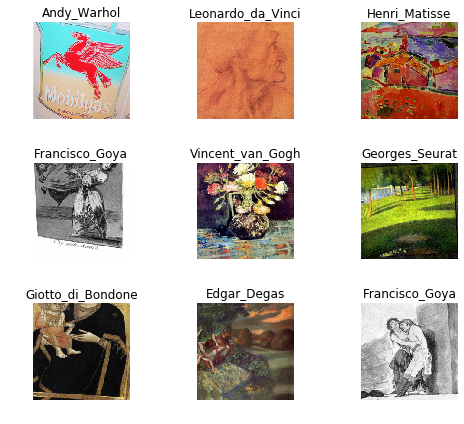

In [64]:
data.show_batch(rows=3, figsize=(7,6))

In [73]:
print("Names of classes : ", data.classes)
print("Total number of classes : ", len(data.classes))

Names of classes :  ['Albrecht_Dürer', 'Alfred_Sisley', 'Amedeo_Modigliani', 'Andrei_Rublev', 'Andy_Warhol', 'Camille_Pissarro', 'Caravaggio', 'Claude_Monet', 'Diego_Rivera', 'Diego_Velazquez', 'Edgar_Degas', 'Edouard_Manet', 'Edvard_Munch', 'El_Greco', 'Eugene_Delacroix', 'Francisco_Goya', 'Frida_Kahlo', 'Georges_Seurat', 'Giotto_di_Bondone', 'Gustav_Klimt', 'Gustave_Courbet', 'Henri_Matisse', 'Henri_Rousseau', 'Henri_de_Toulouse-Lautrec', 'Hieronymus_Bosch', 'Jackson_Pollock', 'Jan_van_Eyck', 'Joan_Miro', 'Kazimir_Malevich', 'Leonardo_da_Vinci', 'Marc_Chagall', 'Michelangelo', 'Mikhail_Vrubel', 'Pablo_Picasso', 'Paul_Cezanne', 'Paul_Gauguin', 'Paul_Klee', 'Peter_Paul_Rubens', 'Pierre-Auguste_Renoir', 'Piet_Mondrian', 'Pieter_Bruegel', 'Raphael', 'Rembrandt', 'Salvador_Dali', 'Sandro_Botticelli', 'Titian', 'Vasiliy_Kandinskiy', 'Vincent_van_Gogh', 'William_Turner', 'test']
Total number of classes :  50


## 4. Training the Model - accuracy

In [0]:
# learn = cnn_learner(data, models.resnet50, pretrained=False, metrics=accuracy)
learn = cnn_learner(data, models.resnet18, pretrained=False, metrics=accuracy)
print("Learn - Done")

Learn - Done


In [0]:
learn.model


In [0]:
start_time = time.time()
learn.lr_find()
print("--- %s mins ---" % ((time.time() - start_time)/60))

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
--- 4.431972388426463 mins ---


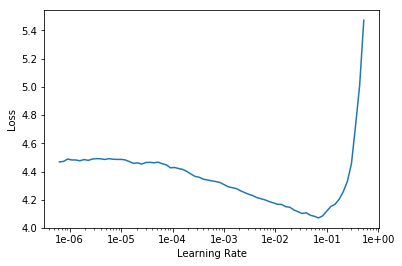

In [0]:
learn.recorder.plot()

In [0]:
# learn.fit_one_cycle(4, 3e-3)
#learn.fit_one_cycle(4, 1e-01)

In [0]:
learn.fit_one_cycle(2)

epoch,train_loss,valid_loss,accuracy,time
0,3.424408,2.964592,0.223030,05:55
1,3.014771,2.664442,0.256364,05:53


In [0]:
learn.unfreeze()
# learn.fit_one_cycle(3, max_lr=slice(1e-6,1e-2))
# learn.fit_one_cycle(1, 1e-6)
learn.fit_one_cycle(2)

In [0]:
# learn.fit_one_cycle(20)

In [0]:
# Save the model
learn.save('simple-model')

In [0]:
# Load the model
learn.load('simple-model');

## 5. Training the Model - error_rate

In [86]:
learn = cnn_learner(data, models.resnet34, pretrained=True, metrics=error_rate)
# models.resnet* download the train modle and add some points and run 
print("Learn - Done : ", time.ctime())

Learn - Done :  Wed Sep 18 21:04:36 2019


In [0]:
learn.model

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
--- 2.293302079041799 mins ---


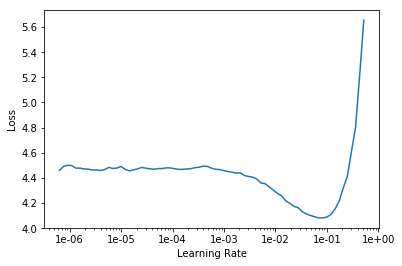

In [88]:
start_time = time.time()
learn.lr_find()
print("--- %s mins ---" % ((time.time() - start_time)/60))
learn.recorder.plot()

In [89]:
# learn.unfreeze()
# learn.fit_one_cycle(3, max_lr=slice(1e-6,1e-2))
# learn.fit_one_cycle(1, 1e-6)
learn.fit_one_cycle(2)

epoch,train_loss,valid_loss,error_rate,time
0,2.525333,1.984998,0.588485,06:17
1,2.004610,1.755807,0.543636,06:20


In [83]:
# learn.unfreeze()
# learn.fit_one_cycle(3, max_lr=slice(1e-6,1e-2))
learn.fit_one_cycle(2, 1e-01)
# learn.fit_one_cycle(2)

epoch,train_loss,valid_loss,error_rate,time
0,6.569006,5.519920,0.901212,06:20
1,3.242713,2.869388,0.752727,06:20


In [84]:
learn.fit_one_cycle(2, max_lr=slice(1e-6,1e-1))

epoch,train_loss,valid_loss,error_rate,time
0,7.451484,25.981728,0.931515,06:22
1,3.320875,6.985482,0.749091,06:18


### Unfreeze and verify

In [90]:
learn.unfreeze()
learn.fit_one_cycle(2)

epoch,train_loss,valid_loss,error_rate,time
0,2.135669,1.909058,0.581818,06:25
1,1.509051,1.381552,0.428485,06:26


In [0]:
# Save the model
learn.save('simple-model')
# Load the model
learn.load('simple-model');

# Verifies the Modle

In [0]:
interp = ClassificationInterpretation.from_learner(learn)
lossses,idxs = interp.top_losses()
len(data.valid_ds) == len(losses) == len(idxs)

In [0]:
interp.plot_top_losses(9, figsize=(10,10))

In [0]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [0]:
interp.most_confused(min_val=2)

# Unfreezing, fine-tuning, and leanring rates

## Inferencerrn

In [92]:
# Load submission file
sample_df = pd.read_csv(DATA_DIR/'sample_submission.csv')
sample_df.head()

,id,predicted_class
0,43de3c52-a0df-40fa-b10f-8d0db8c6ed36.jpg,Vincent_van_Gogh
1,501f0f8e-5bd2-465d-8774-ee14b8fc293e.jpg,Vincent_van_Gogh
2,164eb34f-31b9-42de-b3a8-4d75fd88558f.jpg,Vincent_van_Gogh
3,484857c2-534b-4099-814f-c66d64c06351.jpg,Vincent_van_Gogh
4,f656d82e-c9e7-436d-b7c6-4c33aab35ddf.jpg,Vincent_van_Gogh


In [0]:
# Generate test predictions
learn.data.add_test(ImageList.from_df(sample_df,DATA_DIR,folder='test/test'))

In [0]:
# Load up submission file
preds,y = learn.get_preds(DatasetType.Test)

In [95]:
# Convert predictions to classes
pred_classes = [data.classes[c] for c in list(preds.argmax(dim=1).numpy())]
pred_classes[:10]

['Henri_de_Toulouse-Lautrec',
 'Rembrandt',
 'Francisco_Goya',
 'Andrei_Rublev',
 'Marc_Chagall',
 'Andy_Warhol',
 'Jan_van_Eyck',
 'Andrei_Rublev',
 'Titian',
 'test']

In [96]:
# Add the prediction
sample_df.predicted_class = pred_classes
sample_df.head()

,id,predicted_class
0,43de3c52-a0df-40fa-b10f-8d0db8c6ed36.jpg,Henri_de_Toulouse-Lautrec
1,501f0f8e-5bd2-465d-8774-ee14b8fc293e.jpg,Rembrandt
2,164eb34f-31b9-42de-b3a8-4d75fd88558f.jpg,Francisco_Goya
3,484857c2-534b-4099-814f-c66d64c06351.jpg,Andrei_Rublev
4,f656d82e-c9e7-436d-b7c6-4c33aab35ddf.jpg,Marc_Chagall


In [97]:
# Save the submission file
sample_df.to_csv('submission3.csv',index=False)

from IPython.display import FileLink
FileLink('submission3.csv')

/content/submission3.csv

In [0]:
# Clean up (for commit)
!cp -R data/models models # Move the models out
!rm -rf data # Delete the data

cp: cannot stat 'data/models': No such file or directory
